In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import LinearSVC, SVC
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline

In [2]:
# We create 40 separate points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)

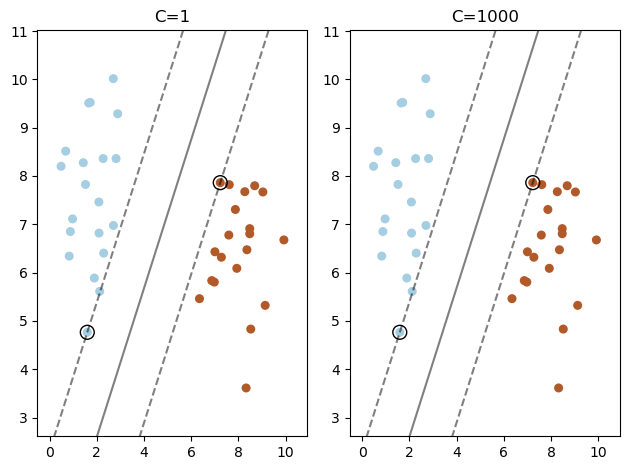

In [3]:
for i, C in enumerate([1, 1000]):
    # "hinge" is the standard SVM loss
    classifier = LinearSVC(C=C, loss="hinge", random_state=20, dual="auto").fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = classifier.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Using Polynorminal kernel to classify non linear data

In [4]:
from sklearn.datasets import make_moons

In [5]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

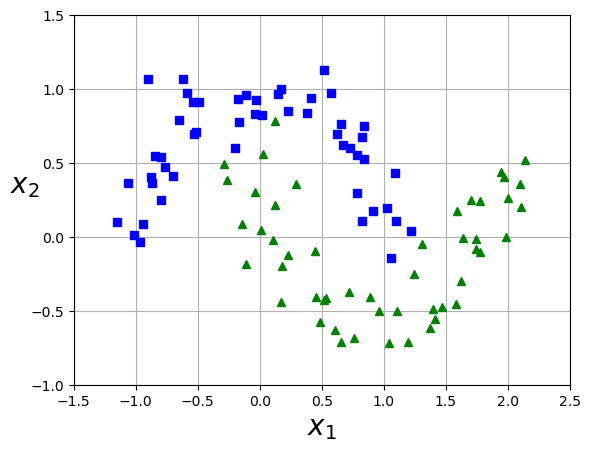

In [6]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [7]:
# Creating X and y arrays

Xs = np.array([[1, 50], [5, 50], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0,0,1,1])

In [8]:
# Standardizing the varibles

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

svm_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='linear', C=100, random_state=42)) # {'poly', 'linear', 'rbf', 'sigmoid', 'precomputed'}
])

In [9]:
svm_pipe.fit(Xs,ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, kernel='linear', random_state=42))])

In [10]:
svm_pipe['svm_clf']

SVC(C=100, kernel='linear', random_state=42)

Text(0.5, 1.0, 'Scaled')

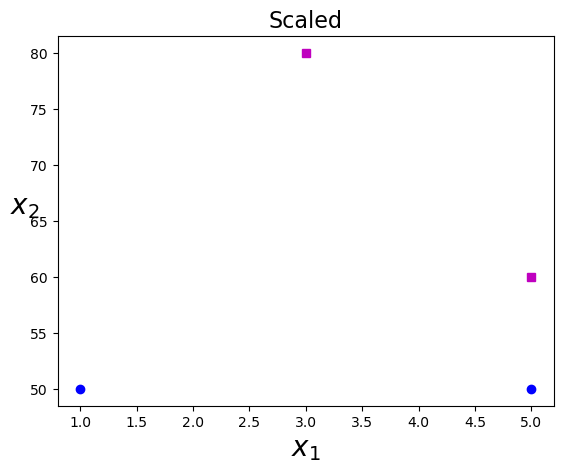

In [11]:
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "bo")
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "ms")
# plot_sv
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.title('Scaled', fontsize=16) 

## 3rd Training

In [12]:
def make_meshgrids(x, y, h=.02):
    """
    Create a mesh of data points to plot in

    Parameters:
    -----------
    x: Data to base x-axis meshgrid on
    y: Data to base y-axis meshgrid on
    h: stepsize for meshgrid -> Optional

    Returns:
    --------
    xx, yy : ndarray
    """

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries for the classifier

    Parameters:
    -----------
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    ax: matplotlib axes object
    clf: the classifier
    params: dictionary of params to pass to the contourf -> Optional
    """

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [13]:
samples = 500
train_prop = 0.8

# make data
x, y = make_circles(n_samples=samples, noise=0.05, random_state=123)

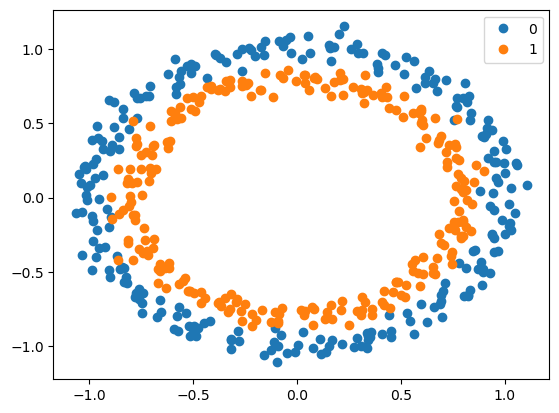

In [14]:
# Visualization
df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], label=y))

groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins # adds 5% padding to the autoscaling -> Optional
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend()

In [15]:
# Minmax Scale
# standardize the datapoints between a range of 0 and 1

x = (x-x.min())/(x.max() - x.min())

Text(0.5, 1.0, 'SVC with Linear kernel')

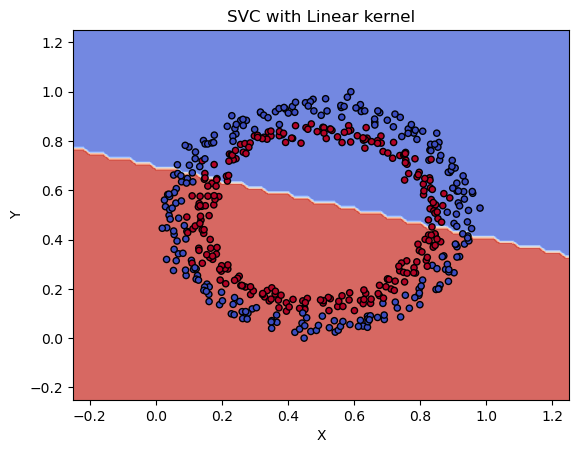

In [19]:
# Linear
C = 1.0 # Regularization parameter

svm_linear_model = SVC(kernel='linear', C=C)
svm_linear_model.fit(x, y)

# title
titles = ('SVC with Linear kernel')

# set up 2X2 grid for plotting
fig, sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrids(X0, X1)

plot_contours(sub, svm_linear_model, xx, yy,
             cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(X0, X1, cmap=plt.cm.coolwarm, c=y, s=20, edgecolors='k')
sub.set_xlim(-0.25, 1.25)
sub.set_ylim(-0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

Text(0.5, 1.0, 'SVC with Poly kernel')

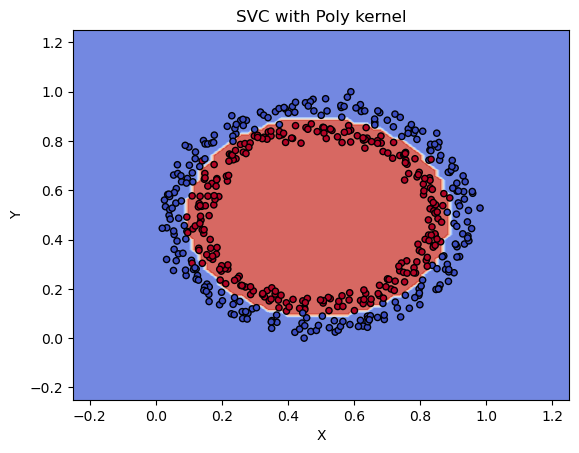

In [29]:
# Polynomial on non-linear data
C = 1.0 # Regularization parameter

svm_poly_model = SVC(kernel='poly', C=C)
svm_poly_model.fit(x, y)

# title
titles = ('SVC with Poly kernel')

# set up 2X2 grid for plotting
fig, sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrids(X0, X1)

plot_contours(sub, svm_linear_model, xx, yy,
             cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(X0, X1, cmap=plt.cm.coolwarm, c=y, s=20, edgecolors='k')
sub.set_xlim(-0.25, 1.25)
sub.set_ylim(-0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

Text(0.5, 1.0, 'SVC with sigmoid kernel')

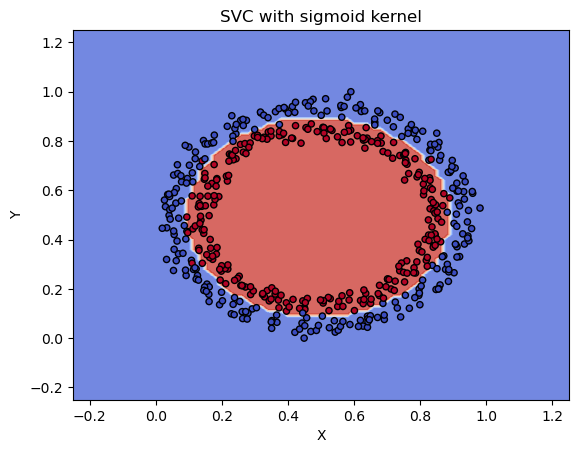

In [28]:
# Sigmoid
C = 1.0 # Regularization parameter

svm_sigmoid_model = SVC(kernel='sigmoid', C=C)
svm_sigmoid_model.fit(x, y)

# title
titles = ('SVC with sigmoid kernel')

# set up 2X2 grid for plotting
fig, sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrids(X0, X1)

plot_contours(sub, svm_linear_model, xx, yy,
             cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(X0, X1, cmap=plt.cm.coolwarm, c=y, s=20, edgecolors='k')
sub.set_xlim(-0.25, 1.25)
sub.set_ylim(-0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

Text(0.5, 1.0, 'SVC with rbf kernel')

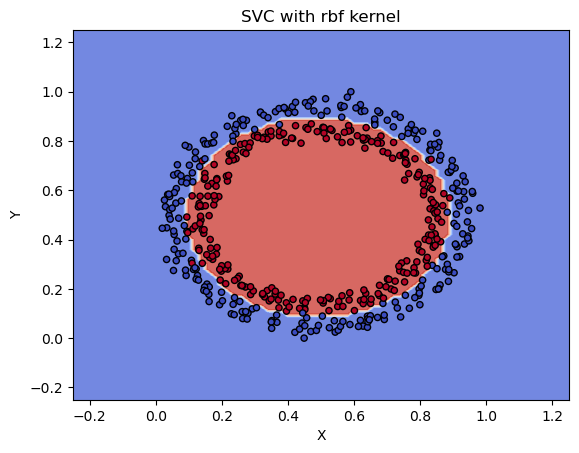

In [27]:
# rbf
C = 1.0 # Regularization parameter

svm_rbf_model = SVC(kernel='rbf', C=C)
svm_rbf_model.fit(x, y)

# title
titles = ('SVC with rbf kernel')

# set up 2X2 grid for plotting
fig, sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrids(X0, X1)

plot_contours(sub, svm_linear_model, xx, yy,
             cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(X0, X1, cmap=plt.cm.coolwarm, c=y, s=20, edgecolors='k')
sub.set_xlim(-0.25, 1.25)
sub.set_ylim(-0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

In [26]:
preds =  plot_contours(ax, clf=svm_linear_model, xx, yy)
preds

SyntaxError: positional argument follows keyword argument (2041541311.py, line 1)

In [35]:
rbf_pred = svm_rbf_model.predict(x)
poly_pred = svm_poly_model.predict(x)
sigmoid_pred = svm_sigmoid_model.predict(x)
linear_pred = svm_linear_model.predict(x)

In [31]:
y

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("RBF model: \n", confusion_matrix(y, rbf_pred), end='\n\n')
print("Sigmoid model: \n", confusion_matrix(y, sigmoid_pred), end='\n\n')
print("Linear model: \n", confusion_matrix(y, linear_pred), end='\n\n')
print("Poly model: \n", confusion_matrix(y, poly_pred), end='\n\n')

RBF model: 
 [[243   7]
 [  5 245]]

Sigmoid model: 
 [[127 123]
 [121 129]]

Linear model: 
 [[243   7]
 [  5 245]]

Poly model: 
 [[120 130]
 [ 76 174]]



In [40]:
print("RBF model: \n", classification_report(y, rbf_pred), end='\n\n')
print("Sigmoid model: \n", classification_report(y, sigmoid_pred), end='\n\n')
print("Linear model: \n", classification_report(y, linear_pred), end='\n\n')
print("Poly model: \n", classification_report(y, poly_pred), end='\n\n')

RBF model: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       250
           1       0.97      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500


Sigmoid model: 
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       250
           1       0.51      0.52      0.51       250

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500


Linear model: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       250
           1       0.97      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98   